# Health Tech Analysis

## Requirements

In [17]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = sqlite3.connect('healthtech_analytics.db')

In [3]:
cursor = conn.cursor()

## Data Setup and Exploration

In [ ]:
#Getting the numbe of patients

cursor.execute('SELECT count(*) FROM patients')
result = cursor.fetchone()
print(f"Total number of patients: {result[0]}")

Total number of patients: 50


In [34]:
#Getting the number of patients in each city

cursor.execute('SELECT patient_id, count(*) FROM patients GROUP BY city;')
results = cursor.fetchall()
results
#results.sort(key=lambda x: x[1], reverse=True)
#print("Number of patients in each city:")
for row in results:
    print(f"City: {row[0]}, Count: {row[1]}")
data = pd.DataFrame(results, columns=['City', 'Count'])


City: 1, Count: 10
City: 10, Count: 10
City: 5, Count: 11
City: 4, Count: 11
City: 2, Count: 8


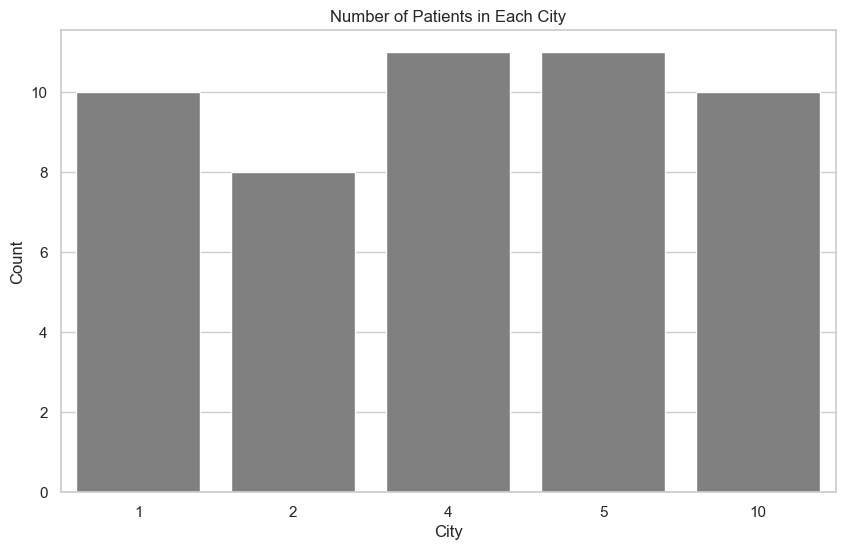

In [31]:
#Plotting the number of patients in each city

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.barplot(x='City', y='Count', data=data, color='grey')
plt.title('Number of Patients in Each City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()


## Diagnoses Table

In [12]:
cursor.execute('SELECT * FROM diagnoses')
diagnoses = cursor.fetchall()
pd.DataFrame(diagnoses)

,0,1
0,D001,Hypertension
1,D002,Diabetes
2,D003,Fracture
3,D004,Migraine
4,D005,Flu


## Doctors

In [13]:
cursor.execute('SELECT * FROM doctors')
doctors = cursor.fetchall()
pd.DataFrame(doctors)

,0,1,2
0,1,Doctor_1,Neurology
1,2,Doctor_2,Pediatrics
2,3,Doctor_3,General Medicine
3,4,Doctor_4,General Medicine
4,5,Doctor_5,Pediatrics
5,6,Doctor_6,Cardiology
6,7,Doctor_7,Cardiology
7,8,Doctor_8,Pediatrics
8,9,Doctor_9,Pediatrics
9,10,Doctor_10,Pediatrics


## Patients

In [14]:
cursor.execute('SELECT * FROM patients')
patients = cursor.fetchall()
pd.DataFrame(patients)

,0,1,2,3,4
0,1,Patient_1,Male,1990-08-26,Cape Town
1,2,Patient_2,Male,1994-06-30,Pretoria
2,3,Patient_3,Female,1974-06-23,Cape Town
3,4,Patient_4,Female,1985-10-06,Port Elizabeth
4,5,Patient_5,Female,1998-06-23,Johannesburg
5,6,Patient_6,Female,1990-01-20,Port Elizabeth
6,7,Patient_7,Male,1986-01-23,Cape Town
7,8,Patient_8,Male,1987-03-25,Johannesburg
8,9,Patient_9,Male,1990-04-05,Pretoria
9,10,Patient_10,Female,2004-03-01,Durban


## Treatments

In [15]:
cursor.execute('SELECT * FROM treatments')
treatments = cursor.fetchall()
pd.DataFrame(treatments)

,0,1,2,3
0,1,37,MRI,135.51
1,2,170,X-ray,1008.35
2,3,67,X-ray,1535.76
3,4,51,MRI,900.66
4,5,142,Blood Test,1660.26
...,...,...,...,...
295,296,11,Surgery,767.95
296,297,122,MRI,633.79
297,298,74,Surgery,129.95
298,299,80,MRI,730.53


## Visits

In [16]:
cursor.execute('SELECT * FROM visits')
visits = cursor.fetchall()
pd.DataFrame(visits)

,0,1,2,3,4
0,1,47,2025-02-09,10,D004
1,2,23,2024-04-17,2,D004
2,3,38,2024-11-22,10,D004
3,4,50,2024-04-14,1,D005
4,5,37,2024-06-08,8,D004
...,...,...,...,...,...
195,196,44,2024-06-04,7,D002
196,197,18,2024-09-10,5,D004
197,198,18,2024-05-29,2,D002
198,199,31,2024-06-07,4,D002


cursor.execute('SELECT * FROM patients')
patients = cursor.fetchall()
pd.DataFrame(patients)